# A Good Disney Quick Service Restaurant
## Kaitlyn Stick-Mueller
## MIS670 Final Project

***


### Introduction

#### What makes a Good Disney Restaurant?
Throughout this project, data will be collected from the AllEars.net reviews for Disney World Quick Service/Counter Service restaurants. Using this dataset, information about what makes a good Disney World restaurant can be uncovered. Data is collected using web scraping techniques, with natural language processing analysis methods of Text Classification, Sentiment Analysis, Topic Modeling, and Text Visualization. The analysis of this project would support Disney dining operations to decide what things they would want to keep or change in order to improve operations and increase customer satisfaction. Some key questions to investigate include:
- What makes a good Disney Restaurant?
- Listening to customer feedback, how can Disney restaurants be improved?
- What types of things are working well in Disney restaurants and should be continued?
- Which restaurants consistently have strong reviews, and what elements give them these consistently high reviews?
- For restaurants that are consistently rated low, what elements are frequently mentioned in them?

Answering these questions can increase visitors and sales at these restaurants, and encourage customers to come over and over again to experience the restaurant in the future. 

***

### Data

Data is collected using a web scraper from [AllEars.net](https://allears.net/dining/menu/search/all/all/all/quick-service/), which provides a list of each Counter Service/Quick Service restaurant on Disney World property. Using this initial site, further links can be collected from this initial page to gather reviews.

In [36]:
# Set up the environment
import time
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.common.exceptions import NoSuchElementException

In [37]:
driver = webdriver.Chrome()

In [3]:
# create pagination 
 
# driver wait 10 seconds until the page loaded 
driver.implicitly_wait(10) 
 

driver.get('https://allears.net/dining/menu/search/all/all/all/quick-service/') 

After the driver is prepared, the site is scraped to gather information for each restaurant, including the title and the corresponding restaurant link.

In [4]:
restaurant_info = {'Title':[],'Urls':[]}

# find each restaurant card
titles = driver.find_elements("xpath", '//div[@class="dining-card-slide item card-slide"]/a')
links = driver.find_elements("xpath", '//div[@class="dining-card-slide item card-slide"]/a')

for title,link in zip(titles,links): 
    restaurant_info['Title'].append(title.get_attribute('textContent').strip())
    restaurant_info['Urls'].append(link.get_attribute('href'))

import pandas as pd  

restaurant_df = pd.DataFrame(restaurant_info)
restaurant_df

,Title,Urls
0,Tortuga Tavern - Lunch/Dinner,https://allears.net/dining/menu/tortuga-tavern...
1,Friar's Nook - Breakfast,https://allears.net/dining/menu/friars-nook/br...
2,Friar's Nook - Lunch/Dinner,https://allears.net/dining/menu/friars-nook/lu...
3,Gaston's Tavern - All-Day,https://allears.net/dining/menu/gastons-tavern...
4,Pinocchio Village Haus - Lunch/Dinner,https://allears.net/dining/menu/pinocchios-vil...
...,...,...
133,Leaning Palms - Lunch,https://allears.net/dining/menu/leaning-palms/...
134,Lowtide Lou's - Lunch,https://allears.net/dining/menu/lowtide-lous/l...
135,Snack Shack - Lunch,https://allears.net/dining/menu/snack-shack/lu...
136,Surf Doggies - Snacks,https://allears.net/dining/menu/surf-doggies/s...


Using the restaurant dataframe, each link can be opened on the scraper. On each link, there is the link to the reviews for the website. The reviews links are collected below, and if there are no reviews for a website, it returns no reviews for that given restaurant. 

In [21]:
ReviewLinks = [] 

for link in restaurant_df['Urls']: 

    time.sleep(5) 

    driver.get(link) 
    
    try:
        reviewLink = driver.find_element("xpath", '//div[@class="card col-stack-mobile review__item"]/a').get_attribute('href')
    except:
        reviewLink = "No Reviews"
        
    ReviewLinks.append(reviewLink) 

print(ReviewLinks)

['https://allears.net/reviews/tortuga-tavern-was-el-pirata-y-el-perico/', 'No Reviews', 'https://allears.net/reviews/friars-nook/', 'https://allears.net/reviews/gastons-tavern/', 'https://allears.net/reviews/pinocchio-village-haus/', 'https://allears.net/reviews/golden-oak-outpost/', 'https://allears.net/reviews/pecos-bill-cafe/', 'https://allears.net/reviews/columbia-harbour-house/', 'https://allears.net/reviews/liberty-square-market/', 'https://allears.net/reviews/caseys-corner/', 'No Reviews', 'https://allears.net/reviews/cosmic-rays-starlight-cafe/', 'No Reviews', 'https://allears.net/reviews/lunching-pad-snacks/', 'https://allears.net/reviews/tomorrowland-terrace-open-seasonally/', 'https://allears.net/reviews/fife-and-drum-tavern/', 'No Reviews', 'https://allears.net/reviews/lotus-blossom-cafe/', 'https://allears.net/reviews/boulangerie-patisserie-les-halles/', 'https://allears.net/reviews/sommerfest/', 'https://allears.net/reviews/katsura-grill-japan/', 'https://allears.net/revi

In [34]:
# Remove duplicate links since some review pages are the same for breakfast or lunch service (help from https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/)
ReviewLinks = list(set(ReviewLinks))
print(ReviewLinks)

['https://allears.net/reviews/blaze-fast-fired-pizza/', 'https://allears.net/reviews/sanaa-breakfast/', 'https://allears.net/reviews/pizzerizzo/', 'https://allears.net/reviews/katsura-grill-japan/', 'https://allears.net/reviews/gasparilla-island-grill/', 'https://allears.net/reviews/centertown-market/', 'https://allears.net/reviews/everything-pop-lunch-dinner/', 'https://allears.net/reviews/restaurantosaurus/', 'https://allears.net/reviews/hurricane-hannas-grill/', 'https://allears.net/reviews/pepper-market-food-court/', 'https://allears.net/reviews/riverside-mill-lunch-dinner/', 'https://allears.net/reviews/beach-club-marketplace/', 'https://allears.net/reviews/intermission-food-court/', 'https://allears.net/reviews/pizzafari/', 'https://allears.net/reviews/liberty-square-market/', 'https://allears.net/reviews/pinocchio-village-haus/', 'https://allears.net/reviews/mara-jambo-house/', 'https://allears.net/reviews/tortuga-tavern-was-el-pirata-y-el-perico/', 'https://allears.net/reviews/

Now that all restaurant review links are stored in the review links list, each site can be scraped to gather information about each review, including the date, review text, author, rating, and recommendation.

In [38]:
# Initialize dictionary to store information 
Review_info = {'Restaurant_name':[], 'Author':[], 'Rating':[], 'Recommended':[], 'Review_text':[], 'Review_date':[]} 

 
# loop through each link
for index, link in enumerate(ReviewLinks): 

    # make sure that the link is available
    if link != 'No Reviews':
        
        # let page load before scraping 
        time.sleep(5) 
        
        # restart driver every 10 links to prevent crashing of driver
        if index % 12 == 0 and index != 0:
            driver.quit()
            driver = webdriver.Chrome()
            
        # grab link in driver
        driver.get(link) 
 
        driver.implicitly_wait(10)  # Ensure the page has loaded 

            
        # find each item card 
        review_items = driver.find_elements("xpath", '//div[@class="review tip review__reviewItem  topic__reviewItem"]') 
 

        # find elements in each review item card 
        for review_item in review_items:  

            try: 
                restaurant_name = review_item.find_element("xpath", '//h1[@class="entry-title"]').get_attribute("textContent").strip() # use local xpath to look for the element inside of each attraction code 
            except: 
                restaurant_name = None 

 
            try: 
                author = review_item.find_element("xpath", './/h2/a').get_attribute("textContent").strip() # use local xpath to look for the element inside of each attraction code 
            except: 
                author = None  
 
            try: 
            	rating = review_item.find_element("xpath", './/h3/div[1]').get_attribute("textContent").strip() 
            except: 
            	rating = None  
 
            try: 
            	recommendation = review_item.find_element("xpath", './/h3/div[2]').get_attribute('textContent').strip() 
            except: 
            	recommendation = None 
 
            try: 
            	review_text = review_item.find_element("xpath", './/p').get_attribute('textContent').strip() 
            except: 
            	review_text = None 

            try: 
            	review_date = review_item.find_element("xpath", './/h2/span').get_attribute('textContent').strip() 
            except: 
            	review_date = None 
 
 
 
            # Append the information to the Review_info dictionary 
            Review_info['Restaurant_name'].append(restaurant_name) 
            Review_info['Author'].append(author) 
            Review_info['Rating'].append(rating) 
            Review_info['Recommended'].append(recommendation)
            Review_info['Review_text'].append(review_text) 
            Review_info['Review_date'].append(review_date)

            if index % 50 == 0 and index != 0:
                pd.DataFrame(Review_info).to_csv('Reviews.csv')

In [39]:
Review_df = pd.DataFrame(Review_info)
Review_df

,Restaurant_name,Author,Rating,Recommended,Review_text,Review_date
0,Reviews of Blaze Fast-Fire’d Pizza,KyleM,Rating: (7),Recommended,My niece was hungry and wanted pizza. I found...,Review Date: 02/27/2024
1,Reviews of Blaze Fast-Fire’d Pizza,jannielane,Rating: (8),Recommended,A fun experience. The pizza service works lik...,Review Date: 12/13/2022
2,Reviews of Blaze Fast-Fire’d Pizza,winags,Rating: (10),Recommended,We love this for quick service and good food. ...,Review Date: 06/13/2022
3,Reviews of Blaze Fast-Fire’d Pizza,None,Rating: (7),Recommended,This is definitely good pizza if you’re cravin...,Review Date: 05/31/2022
4,Reviews of Blaze Fast-Fire’d Pizza,None,Rating: (10),Recommended,My family and I always go to Blaze on Central ...,Review Date: 02/03/2022
...,...,...,...,...,...,...
640,Reviews of Contempo Cafe,AmberMac,Rating: (10),Recommended,"One word: CUPCAKES!!\nAlso, good snacks and ic...",Review Date: 02/06/2020
641,Reviews of Contempo Cafe,bjtrax,Rating: (10),Recommended,We ate here daily on a recent 4 night stay and...,Review Date: 12/13/2019
642,Reviews of Contempo Cafe,None,Rating: (8),Recommended,Best Bakery Dessert Section in a Quick Service!,Review Date: 04/20/2019
643,Reviews of Contempo Cafe,Kat1954,Rating: (8),Recommended,Contempo cafe meal on 3/27/19,Review Date: 04/01/2019


Since this scraper took quite some time to gather from the large number of review links, the data was saved to a CSV so that it could be easily accessed again at a later time.

In [6]:
#Review_df.to_csv('Reviews.csv')

In [122]:
# re import scraped data for analysis

import pandas as pd

# import file
df = pd.read_csv("Reviews.csv")
df

,Unnamed: 0,Restaurant_name,Author,Rating,Recommended,Review_text,Review_date
0,0,Reviews of Blaze Fast-Fire’d Pizza,KyleM,Rating: (7),Recommended,My niece was hungry and wanted pizza. I found...,Review Date: 02/27/2024
1,1,Reviews of Blaze Fast-Fire’d Pizza,jannielane,Rating: (8),Recommended,A fun experience. The pizza service works lik...,Review Date: 12/13/2022
2,2,Reviews of Blaze Fast-Fire’d Pizza,winags,Rating: (10),Recommended,We love this for quick service and good food. ...,Review Date: 06/13/2022
3,3,Reviews of Blaze Fast-Fire’d Pizza,NaN,Rating: (7),Recommended,This is definitely good pizza if you’re cravin...,Review Date: 05/31/2022
4,4,Reviews of Blaze Fast-Fire’d Pizza,NaN,Rating: (10),Recommended,My family and I always go to Blaze on Central ...,Review Date: 02/03/2022
...,...,...,...,...,...,...,...
640,640,Reviews of Contempo Cafe,AmberMac,Rating: (10),Recommended,"One word: CUPCAKES!!\nAlso, good snacks and ic...",Review Date: 02/06/2020
641,641,Reviews of Contempo Cafe,bjtrax,Rating: (10),Recommended,We ate here daily on a recent 4 night stay and...,Review Date: 12/13/2019
642,642,Reviews of Contempo Cafe,NaN,Rating: (8),Recommended,Best Bakery Dessert Section in a Quick Service!,Review Date: 04/20/2019
643,643,Reviews of Contempo Cafe,Kat1954,Rating: (8),Recommended,Contempo cafe meal on 3/27/19,Review Date: 04/01/2019


In [123]:
# clean up dataset

# drop extra column
df = df.drop("Unnamed: 0", axis = 1)

# fix restaurant name to remove the "Reviews of" part
df['Restaurant_name'] = df['Restaurant_name'].str.replace(r'^Reviews of ', '', regex=True)

# fix rating section to only show the rating 1-10 
df['Rating'] = df['Rating'].str.replace(r'^Rating', '', regex=True).str.replace('[ (:)]', '', regex=True)

# fix review date column to show only the date
df['Review_date'] = df['Review_date'].str.replace(r'^Review Date: ', '', regex=True)

# make date a datetime datatype
df['Review_date'] = pd.to_datetime(df['Review_date'])

# see output
df

,Restaurant_name,Author,Rating,Recommended,Review_text,Review_date
0,Blaze Fast-Fire’d Pizza,KyleM,7,Recommended,My niece was hungry and wanted pizza. I found...,2024-02-27
1,Blaze Fast-Fire’d Pizza,jannielane,8,Recommended,A fun experience. The pizza service works lik...,2022-12-13
2,Blaze Fast-Fire’d Pizza,winags,10,Recommended,We love this for quick service and good food. ...,2022-06-13
3,Blaze Fast-Fire’d Pizza,NaN,7,Recommended,This is definitely good pizza if you’re cravin...,2022-05-31
4,Blaze Fast-Fire’d Pizza,NaN,10,Recommended,My family and I always go to Blaze on Central ...,2022-02-03
...,...,...,...,...,...,...
640,Contempo Cafe,AmberMac,10,Recommended,"One word: CUPCAKES!!\nAlso, good snacks and ic...",2020-02-06
641,Contempo Cafe,bjtrax,10,Recommended,We ate here daily on a recent 4 night stay and...,2019-12-13
642,Contempo Cafe,NaN,8,Recommended,Best Bakery Dessert Section in a Quick Service!,2019-04-20
643,Contempo Cafe,Kat1954,8,Recommended,Contempo cafe meal on 3/27/19,2019-04-01


In [124]:
# check for duplicate rows
df[df.duplicated()]

,Restaurant_name,Author,Rating,Recommended,Review_text,Review_date


In [125]:
# drop empty review text rows
df = df.dropna(subset=['Review_text'])
df = df.reset_index()
df = df.drop('index', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant_name  644 non-null    object        
 1   Author           488 non-null    object        
 2   Rating           644 non-null    object        
 3   Recommended      644 non-null    object        
 4   Review_text      644 non-null    object        
 5   Review_date      644 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 30.3+ KB


### Methodology

This section includes text cleaning, key questions to answer through text analysis, natural language processing analysis, and NLP visualization.

In [126]:
# clean text using cleaning pipeline to gather nouns, adjectives, and adverbs

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()

def clean_pipeline(text):
    
    # 1. lower all the cases in 'Review_text'
    text = text.lower()
    
    # 6. removing special characters, keeping words and numbers
    clean_text = re.sub("[^a-zA-Z0-9]", " ", text)   
    
    # 2. tokenizing sentences into words
    token_list = word_tokenize(clean_text)

    # 3. Removing stopwords and meaningless words
    
    # Load the default NLTK stopwords set for English
    stop_words = set(stopwords.words('english'))

    # Save the non-stopwords in a list
    filtered_tokens = [word for word in token_list if word not in stop_words]

    # 4. Lemmatizing the list without stopwords
    lemma_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # 5. filtering nouns, adjectives, and adverbs
    word_tag = pos_tag(lemma_words)
    
    nouns_adjs = [word for word, tag in word_tag if "NN" or "JJ" or "RB" in tag ]
    
    # 6. Removing special characters, keeping words and numbers
    
    # Join tokens into a string before using re.sub
    nouns_adjs_text = ' '.join(nouns_adjs)
    clean_text = re.sub("[^a-zA-Z0-9]", " ", nouns_adjs_text)

    return clean_text

In [127]:
# apply pipeline to review text

df["cleaned_review"] = df["Review_text"].apply(clean_pipeline)

df

,Restaurant_name,Author,Rating,Recommended,Review_text,Review_date,cleaned_review
0,Blaze Fast-Fire’d Pizza,KyleM,7,Recommended,My niece was hungry and wanted pizza. I found...,2024-02-27,niece hungry wanted pizza found place lied rem...
1,Blaze Fast-Fire’d Pizza,jannielane,8,Recommended,A fun experience. The pizza service works lik...,2022-12-13,fun experience pizza service work like chipotl...
2,Blaze Fast-Fire’d Pizza,winags,10,Recommended,We love this for quick service and good food. ...,2022-06-13,love quick service good food also love sit wat...
3,Blaze Fast-Fire’d Pizza,NaN,7,Recommended,This is definitely good pizza if you’re cravin...,2022-05-31,definitely good pizza craving disney world exc...
4,Blaze Fast-Fire’d Pizza,NaN,10,Recommended,My family and I always go to Blaze on Central ...,2022-02-03,family always go blaze central ave toledo ohio...
...,...,...,...,...,...,...,...
639,Contempo Cafe,AmberMac,10,Recommended,"One word: CUPCAKES!!\nAlso, good snacks and ic...",2020-02-06,one word cupcake also good snack ice cream
640,Contempo Cafe,bjtrax,10,Recommended,We ate here daily on a recent 4 night stay and...,2019-12-13,ate daily recent 4 night stay really enjoyed f...
641,Contempo Cafe,NaN,8,Recommended,Best Bakery Dessert Section in a Quick Service!,2019-04-20,best bakery dessert section quick service
642,Contempo Cafe,Kat1954,8,Recommended,Contempo cafe meal on 3/27/19,2019-04-01,contempo cafe meal 3 27 19


#### Data Analysis Goals
What information can be gathered through this text analysis?

- What kinds of things do customers really like about the restaurants?
- What things do customers not like about the restaurants?
- Can we predict whether a customer will recommend a restaurant from their review?
- What attitude do customers generally have towards Disney quick service restaurants?
- Do more recent customers have different levels of satisfaction compared to older reviews?
- How are negatively reviewed restaurants typically described compared to positively rated restaurants?

***
#### Text Classification

In [128]:
# text classification - Can we predict whether a customer will recommend a restaurant based on their review?

# try use different classifiers, vectorizers, and proportions of testing data 

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline


classifiers = {"Naive Bayes": MultinomialNB(),
               "SVM": svm.SVC(),
               "KNN": KNeighborsClassifier(),
               "Logistic Regression": LogisticRegression()
              }


vectorizers = {"TfidfVectorizer": TfidfVectorizer(),
              "CountVectorizer": CountVectorizer()}

test_proportions = [0.5, 0.3, 0.2] 

In [129]:
# set independent and dependent variables
X = df['cleaned_review']
y = df['Recommended']

In [130]:
# Build and evaluate models

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Initialize variables to track the model with the highest accuracy
best_model_report = None
highest_accuracy = 0
best_model_info = ""

# generate each combination of models with different tests, models, and vectorizers
for t in test_proportions:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, 
                                                        random_state=0)
    
    for classifier_name, classifier in classifiers.items(): # looping different models
        for vectorizer_name, vectorizer in vectorizers.items(): # looping different vectorizers
            
            model = make_pipeline(vectorizer, classifier)                # finish the model pipeline here

            model.fit(X_train, y_train)
            
            y_predict = model.predict(X_test)

            # save the classfication report in dictionary format
            reports = classification_report(y_test, y_predict, output_dict=True, zero_division=0)
            
            # get the accuracy from the report
            accuracy = reports['accuracy']

            # Update the highest accuracy and store the best model report and information if applicable
            if accuracy > highest_accuracy:
                highest_accuracy = accuracy
                best_model_report = classification_report(y_test, y_predict, zero_division=0)  # Store the formatted report
                best_model_info = f"Best classification model report for {classifier_name} with {vectorizer_name} using {t} cleaned testing data:"

            print(f"Classification model report for {classifier_name} with {vectorizer_name} using {t} cleaned testing data:")
            print(classification_report(y_test, y_predict, zero_division=0))
            print("-----------------------------------------------------------------------")
            print("")
                  
print(best_model_info)
print(best_model_report)

Classification model report for Naive Bayes with TfidfVectorizer using 0.5 cleaned testing data:
                 precision    recall  f1-score   support

Not Recommended       0.00      0.00      0.00        71
    Recommended       0.78      1.00      0.88       251

       accuracy                           0.78       322
      macro avg       0.39      0.50      0.44       322
   weighted avg       0.61      0.78      0.68       322

-----------------------------------------------------------------------

Classification model report for Naive Bayes with CountVectorizer using 0.5 cleaned testing data:
                 precision    recall  f1-score   support

Not Recommended       1.00      0.15      0.27        71
    Recommended       0.81      1.00      0.89       251

       accuracy                           0.81       322
      macro avg       0.90      0.58      0.58       322
   weighted avg       0.85      0.81      0.76       322

-------------------------------------------

The best text classification model was Naives Bayes with the CountVectorizer vectorizer, using a test size of 0.3. This model had accuracy of 0.82, which is the highest of all the built models. Several other models had accuracy of 0.82, and was able to similarly classify text such as Logistic Regression with CountVectorizer using 0.2 test size, which had slihtly lower precision, recall, and f1-scores. The Naives Bayes model was able to decently well predict whether a customer would recommend or not recommend a restaurant from their review. For recommended reviews, the precision, recall, and f1-scores were 0.83, 0.99, and 0.90, so the model was able to well classify true recommended reviews as recommended. The model struggled a little more with Not Recommended reviews, with precision, recall, and f1-scores of 0.82, 0.22, and 0.35. However, the model overall was able to predict the recommendation for most reviews.

#### Sentiment Analysis

In [131]:
# Use Lexicon Sentiment Analysis to assign positive, negative, or neutral tone to each review

#Bing-Liu lexicon (positive word list & negative word list)
BLpositive_words = open('Bing_liu_positive.txt', "r").read().splitlines()
BLnegative_words = open('Bing_liu_negative.txt', "r").read().splitlines()

# identify the sentiment and save the values to a column

def sentiment(token_list):
    """
    The sum function adds up these 1s and 0s, 
    effectively counting the number of either postive or negative words in token_list.
    """
    positive = sum(word in BLpositive_words for word in token_list)
    negative = sum(word in BLnegative_words for word in token_list)
    
    if positive > negative:
        return "Positive"
    elif positive < negative:
        return "Negative"
    else:
        return "Neutral"

df_sent = df

# tokenize words to use in sentiment analysis
df_sent['review_tokens'] = df_sent['cleaned_review'].apply(lambda x: x.split())

# apply sentiment
df_sent["Sentiment"] = df_sent["review_tokens"].apply(sentiment)

df_sent

,Restaurant_name,Author,Rating,Recommended,Review_text,Review_date,cleaned_review,review_tokens,Sentiment
0,Blaze Fast-Fire’d Pizza,KyleM,7,Recommended,My niece was hungry and wanted pizza. I found...,2024-02-27,niece hungry wanted pizza found place lied rem...,"[niece, hungry, wanted, pizza, found, place, l...",Neutral
1,Blaze Fast-Fire’d Pizza,jannielane,8,Recommended,A fun experience. The pizza service works lik...,2022-12-13,fun experience pizza service work like chipotl...,"[fun, experience, pizza, service, work, like, ...",Positive
2,Blaze Fast-Fire’d Pizza,winags,10,Recommended,We love this for quick service and good food. ...,2022-06-13,love quick service good food also love sit wat...,"[love, quick, service, good, food, also, love,...",Positive
3,Blaze Fast-Fire’d Pizza,NaN,7,Recommended,This is definitely good pizza if you’re cravin...,2022-05-31,definitely good pizza craving disney world exc...,"[definitely, good, pizza, craving, disney, wor...",Positive
4,Blaze Fast-Fire’d Pizza,NaN,10,Recommended,My family and I always go to Blaze on Central ...,2022-02-03,family always go blaze central ave toledo ohio...,"[family, always, go, blaze, central, ave, tole...",Positive
...,...,...,...,...,...,...,...,...,...
639,Contempo Cafe,AmberMac,10,Recommended,"One word: CUPCAKES!!\nAlso, good snacks and ic...",2020-02-06,one word cupcake also good snack ice cream,"[one, word, cupcake, also, good, snack, ice, c...",Positive
640,Contempo Cafe,bjtrax,10,Recommended,We ate here daily on a recent 4 night stay and...,2019-12-13,ate daily recent 4 night stay really enjoyed f...,"[ate, daily, recent, 4, night, stay, really, e...",Positive
641,Contempo Cafe,NaN,8,Recommended,Best Bakery Dessert Section in a Quick Service!,2019-04-20,best bakery dessert section quick service,"[best, bakery, dessert, section, quick, service]",Positive
642,Contempo Cafe,Kat1954,8,Recommended,Contempo cafe meal on 3/27/19,2019-04-01,contempo cafe meal 3 27 19,"[contempo, cafe, meal, 3, 27, 19]",Neutral


In [132]:
# recommendation versus sentiment

df_sent.groupby(["Recommended", "Sentiment"])["Author"].count()

Recommended      Sentiment
Not Recommended  Negative      24
                 Neutral       15
                 Positive      39
Recommended      Negative      20
                 Neutral       31
                 Positive     359
Name: Author, dtype: int64

In [133]:
# rating versus sentiment

df_sent.groupby(["Rating", "Sentiment"])["Author"].count()

Rating  Sentiment
0       Neutral       1
        Positive      1
1       Negative      4
        Neutral       2
        Positive      1
10      Negative      2
        Neutral       6
        Positive     98
2       Negative      2
        Neutral       1
        Positive      2
3       Negative      8
        Neutral       1
        Positive      5
4       Negative      5
        Neutral       5
        Positive      7
5       Negative      4
        Neutral       6
        Positive     23
6       Negative      7
        Neutral       5
        Positive     30
7       Negative      5
        Neutral       5
        Positive     75
8       Negative      5
        Neutral       8
        Positive     79
9       Negative      2
        Neutral       6
        Positive     77
Name: Author, dtype: int64

In [134]:
# use pattern to gather polarity and subjectivity for each review
from pattern.en import sentiment

# iterate each cleaned review
for index, cleaned_review in enumerate(df_sent['review_tokens']):
    
    # upack the two scores from tuples
    polarity, subjectivity = sentiment(cleaned_review)
    
    df_sent.loc[index,'Polarity'] = polarity
    df_sent.loc[index,'Subjectivity'] = subjectivity

df_sent

,Restaurant_name,Author,Rating,Recommended,Review_text,Review_date,cleaned_review,review_tokens,Sentiment,Polarity,Subjectivity
0,Blaze Fast-Fire’d Pizza,KyleM,7,Recommended,My niece was hungry and wanted pizza. I found...,2024-02-27,niece hungry wanted pizza found place lied rem...,"[niece, hungry, wanted, pizza, found, place, l...",Neutral,0.100000,0.300000
1,Blaze Fast-Fire’d Pizza,jannielane,8,Recommended,A fun experience. The pizza service works lik...,2022-12-13,fun experience pizza service work like chipotl...,"[fun, experience, pizza, service, work, like, ...",Positive,0.186905,0.496429
2,Blaze Fast-Fire’d Pizza,winags,10,Recommended,We love this for quick service and good food. ...,2022-06-13,love quick service good food also love sit wat...,"[love, quick, service, good, food, also, love,...",Positive,0.508333,0.575000
3,Blaze Fast-Fire’d Pizza,NaN,7,Recommended,This is definitely good pizza if you’re cravin...,2022-05-31,definitely good pizza craving disney world exc...,"[definitely, good, pizza, craving, disney, wor...",Positive,0.700000,0.600000
4,Blaze Fast-Fire’d Pizza,NaN,10,Recommended,My family and I always go to Blaze on Central ...,2022-02-03,family always go blaze central ave toledo ohio...,"[family, always, go, blaze, central, ave, tole...",Positive,0.341667,0.402778
...,...,...,...,...,...,...,...,...,...,...,...
639,Contempo Cafe,AmberMac,10,Recommended,"One word: CUPCAKES!!\nAlso, good snacks and ic...",2020-02-06,one word cupcake also good snack ice cream,"[one, word, cupcake, also, good, snack, ice, c...",Positive,0.700000,0.600000
640,Contempo Cafe,bjtrax,10,Recommended,We ate here daily on a recent 4 night stay and...,2019-12-13,ate daily recent 4 night stay really enjoyed f...,"[ate, daily, recent, 4, night, stay, really, e...",Positive,0.375000,0.557407
641,Contempo Cafe,NaN,8,Recommended,Best Bakery Dessert Section in a Quick Service!,2019-04-20,best bakery dessert section quick service,"[best, bakery, dessert, section, quick, service]",Positive,0.666667,0.400000
642,Contempo Cafe,Kat1954,8,Recommended,Contempo cafe meal on 3/27/19,2019-04-01,contempo cafe meal 3 27 19,"[contempo, cafe, meal, 3, 27, 19]",Neutral,0.000000,0.000000


In [135]:
# make rating an integer type for analysis
df_sent['Rating'] = df_sent['Rating'].astype(int)
df_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant_name  644 non-null    object        
 1   Author           488 non-null    object        
 2   Rating           644 non-null    int32         
 3   Recommended      644 non-null    object        
 4   Review_text      644 non-null    object        
 5   Review_date      644 non-null    datetime64[ns]
 6   cleaned_review   644 non-null    object        
 7   review_tokens    644 non-null    object        
 8   Sentiment        644 non-null    object        
 9   Polarity         644 non-null    float64       
 10  Subjectivity     644 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int32(1), object(7)
memory usage: 53.0+ KB


In [136]:
# average polarity and subjectivity for levels of reviews

print('Reviews rated higher than 5:')
print(df_sent[df_sent['Rating'] > 5][['Polarity','Subjectivity']].mean())
print('')

print('Reviews rated exactly 5:')
print(df_sent[df_sent['Rating'] == 5][['Polarity','Subjectivity']].mean())
print('')

print('Reviews rated lower than 5:')
print(df_sent[df_sent['Rating'] < 5][['Polarity','Subjectivity']].mean())

Reviews rated higher than 5:
Polarity        0.323859
Subjectivity    0.583270
dtype: float64

Reviews rated exactly 5:
Polarity        0.179800
Subjectivity    0.511813
dtype: float64

Reviews rated lower than 5:
Polarity        0.002886
Subjectivity    0.545021
dtype: float64


In [137]:
# average polarity and subjectivity for recommended or not


print('Reviews that recommend restaurant:')
print(df_sent[df_sent['Recommended'] == 'Recommended'][['Polarity','Subjectivity']].mean())
print('')

print('Reviews that do not recomend restaurant:')
print(df_sent[df_sent['Recommended'] == 'Not Recommended'][['Polarity','Subjectivity']].mean())
print('')


Reviews that recommend restaurant:
Polarity        0.325472
Subjectivity    0.582875
dtype: float64

Reviews that do not recomend restaurant:
Polarity        0.048106
Subjectivity    0.533001
dtype: float64



In [138]:
# sentiment, polarity, and subjectivity for recent versus older reviews

print('Reviews 2024 or newer:')
print("--------------------------------------------------------------------------")
print(df_sent[df_sent['Review_date'].dt.year >= 2024][['Polarity','Subjectivity']].mean())
print("--------------------------------------------------------------------------")
print(df_sent[df_sent['Review_date'].dt.year >= 2024].groupby(["Recommended", "Sentiment"])["Author"].count())
print("--------------------------------------------------------------------------")
print('')
print('')

print('Reviews 2023 or older:')
print("--------------------------------------------------------------------------")
print(df_sent[df_sent['Review_date'].dt.year < 2024][['Polarity','Subjectivity']].mean())
print("--------------------------------------------------------------------------")
print(df_sent[df_sent['Review_date'].dt.year < 2024].groupby(["Recommended", "Sentiment"])["Author"].count())




Reviews 2024 or newer:
--------------------------------------------------------------------------
Polarity        0.278315
Subjectivity    0.574774
dtype: float64
--------------------------------------------------------------------------
Recommended      Sentiment
Not Recommended  Negative      5
                 Neutral       2
                 Positive      3
Recommended      Negative      2
                 Neutral       5
                 Positive     66
Name: Author, dtype: int64
--------------------------------------------------------------------------


Reviews 2023 or older:
--------------------------------------------------------------------------
Polarity        0.269756
Subjectivity    0.572780
dtype: float64
--------------------------------------------------------------------------
Recommended      Sentiment
Not Recommended  Negative      19
                 Neutral       13
                 Positive      36
Recommended      Negative      18
                 Neutral       2

From the sentiment analysis, it appears that overall, reviews that recommended the restaurant or gave high ratings do appear to have positive sentiment. However, many reviews that gave low rating or did not recommend the restaurant also had many positive reviews.

#### Topic Modeling 

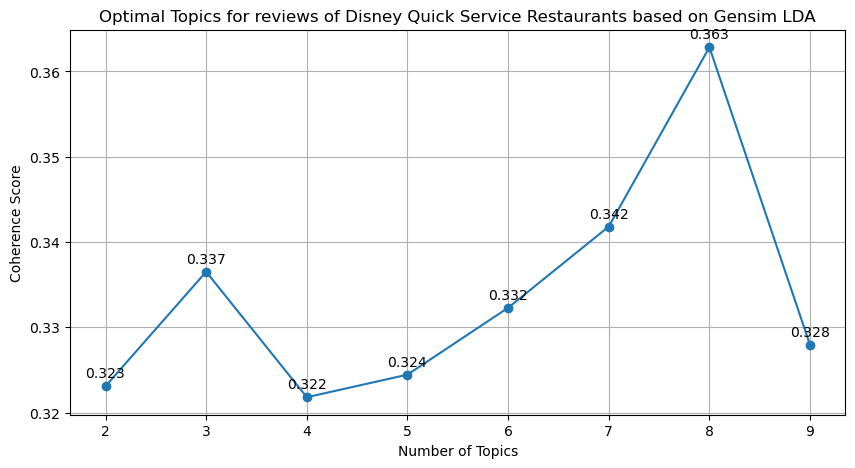

In [141]:
# use coherence scores to decide ideal number of topics

# Gensim LDA model
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# doc2bow expects an array of unicode tokens
token_list = df["cleaned_review"].apply(lambda x: word_tokenize(x))

# Create a dictionary representation of the documents
dictionary = Dictionary(token_list)

# Convert document into the bag-of-words (BoW) format
corpus = [dictionary.doc2bow(text) for text in token_list]

import matplotlib.pyplot as plt
%matplotlib inline

# create an empty list to save different coherence scores 
coherence_scores = []

# loop through models to get coherence scores
for num in range(2, 10):
    # build the LDA model using the different number of topics

    lda_model_gensim = LdaModel(corpus=corpus, num_topics=num, 
                     id2word=dictionary, # convert the word id into word itself
                     random_state=0)
    
    coherence_model = CoherenceModel(model=lda_model_gensim, 
                                     texts=token_list, 
                                     dictionary=dictionary, 
                                     coherence='c_v') # normalized pointwise mutual information (NPMI) and a cosine similarity
                                                      # evaluating how often words co-occur compared to what would be expected by chance.
                                                      # often considered the most comprehensive measure metric
    
    coherence_scores.append(coherence_model.get_coherence())

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), coherence_scores, marker='o')
plt.title("Optimal Topics for reviews of Disney Quick Service Restaurants based on Gensim LDA")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
for x, y in zip(range(2, 10), coherence_scores):
    plt.text(x, y + 0.001, f"{y:.3f}", ha='center') # use GAI and matplotlib documentation to assist in labeling
plt.grid(True)

In [160]:
# use topic modeling to find key topics for each top rated and lowest rated restaurants using number of topics from above

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation

# used GAI to help figure out how to access the restaurant names for the top and bottom rated restaurants

# lowest rated restaurants
bottom_10 = df.groupby(['Restaurant_name'])['Rating'].mean().sort_values().head(10).index.tolist()

# top rated restaurants
top_10 = df.groupby(['Restaurant_name'])['Rating'].mean().sort_values().tail(10).index.tolist()

for Restaurant in bottom_10 + top_10: # loop through top rated and lowest rated restaurants

    
    df_Restaurant = df[df['Restaurant_name'] == Restaurant]

    

    for vec_type, vectorizer in [("tfidfvectorizer", TfidfVectorizer(stop_words='english')), ("countvectorizer", CountVectorizer(stop_words='english'))]: # vectorizers

        for model_name, model_choice in [("latentdirichletallocation", LatentDirichletAllocation(n_components = 8, random_state=0))]: # model

            model = make_pipeline(vectorizer,
                         model_choice)

            # train the model using unlabeled data
            MODEL = model.fit(df_Restaurant['cleaned_review'])

            # Get the model and feature names
            model1 = model.named_steps[model_name]
            vector = model.named_steps[vectorizer.__class__.__name__.lower()]
            feature_names = vector.get_feature_names_out()

            # Get the top words for each topic
            n_top_words = 10
            topic_keywords = {}

            # grab the top n_top_words from each topic
            # at the previous step, we set n_components = 8 (8 topics)
            for topic_idx, topic in enumerate(model1.components_):
    
                # sort the topic words by the probabilities
                # the words having high probablities consider more importance
                # argsort() is going to ascending the words 
                top_features_idx = topic.argsort()[-n_top_words:][::-1]
                top_features = [feature_names[i] for i in top_features_idx]
                topic_keywords[f"Topic {topic_idx}"] = top_features

            # Display the top words for each topic
            print(f"Top topics of {Restaurant} for {model_name} using {vec_type}:")

            for topic, keywords in list(topic_keywords.items()):
                print(f"{topic}: {', '.join(keywords)}")

            print("")

Top topics of D-Luxe Burger for latentdirichletallocation using tfidfvectorizer:
Topic 0: hard, really, meal, disney, burger, time, pretty, like, people, good
Topic 1: world, party, best, disney, property, time, burger, really, meal, pretty
Topic 2: really, meal, disney, burger, time, like, people, pretty, good, certainly
Topic 3: really, meal, disney, burger, time, like, people, pretty, good, certainly
Topic 4: original, new, disappointing, unless, juicy, patty, change, agree, employee, bring
Topic 5: bacon, burger, cooked, spring, milkshake, tasty, good, disney, cheeseburger, order
Topic 6: 10, mistake, rule, puck, darn, definitely, exception, send, getting, guess
Topic 7: favorite, burger, food, property, place, maybe, certainly, bite, fry, salad

Top topics of D-Luxe Burger for latentdirichletallocation using countvectorizer:
Topic 0: hard, burger, property, time, fry, disney, way, certainly, food, new
Topic 1: property, time, world, best, party, disney, burger, hard, fry, way
Topi

In [163]:
# see key topics of recommended versus not recommended restaurants

for Recommendation in df['Recommended'].unique(): # loop through topic domains
    df_Recommended = df[df['Recommended'] == Recommendation]

    for vec_type, vectorizer in [("tfidfvectorizer", TfidfVectorizer(stop_words='english')), ("countvectorizer", CountVectorizer(stop_words='english'))]: # vectorizers

        for model_name, model_choice in [("latentdirichletallocation", LatentDirichletAllocation(n_components = 8, random_state=0))]: # model

            model = make_pipeline(vectorizer,
                         model_choice)

            # train the model using unlabeled data
            MODEL = model.fit(df_Recommended['cleaned_review'])

            # Get the model and feature names
            model1 = model.named_steps[model_name]
            vector = model.named_steps[vectorizer.__class__.__name__.lower()]
            feature_names = vector.get_feature_names_out()

            # Get the top words for each topic
            n_top_words = 10
            topic_keywords = {}

            # grab the top n_top_words from each topic
            # at the previous step, we set n_components = 8 (8 topics)
            for topic_idx, topic in enumerate(model1.components_):
    
                # sort the topic words by the probabilities
                # the words having high probablities consider more importance
                # argsort() is going to ascending the words 
                top_features_idx = topic.argsort()[-n_top_words:][::-1]
                top_features = [feature_names[i] for i in top_features_idx]
                topic_keywords[f"Topic {topic_idx}"] = top_features

            # Display the top words for each topic
            print(f"Top topics of {Recommendation} restaurants for {model_name} using {vec_type}:")

            for topic, keywords in list(topic_keywords.items()):
                print(f"{topic}: {', '.join(keywords)}")

            print("")

Top topics of Recommended restaurants for latentdirichletallocation using tfidfvectorizer:
Topic 0: real, exiting, cinnamon, roll, burger, tasty, pool, courteous, wife, staff
Topic 1: food, good, nacho, allergy, lunch, cast, quick, place, member, great
Topic 2: quick, service, best, favorite, resort, cheese, place, amazing, wdw, good
Topic 3: day, good, hidden, stop, park, hot, insane, outwith, reasonably, priced
Topic 4: food, good, great, breakfast, love, service, option, really, seating, quick
Topic 5: time, epcot, like, food, good, ronto, wrap, option, lunch, great
Topic 6: nice, gluten, strip, outside, free, lagoon, cupcake, cheese, little, theme
Topic 7: food, ok, year, dependable, child, opinion, good, perfectly, mickey, beach

Top topics of Recommended restaurants for latentdirichletallocation using countvectorizer:
Topic 0: food, good, park, order, vegan, burger, place, love, roll, theme
Topic 1: food, good, breakfast, great, quick, lunch, seating, dinner, place, eat
Topic 2: 

From Topic Modeling, it appears that many highlights of individual good or bad restaurants seem to highlight the food offerings. For instance, Pecos Bills restaurant, which is a low rated restaurant, say things like "ok quick taco place", "fine pork beef nacho" and "skimpy stale soggy downhill", indicating that the food quality might not be great, while higher rated restaurants like Sanaa have topics like "great bread love drink", "great indian food", and "tasty super phenomenal cheeseburger." This may indicate that the quality of the food served at the restaurant may make the biggest difference to how a customer feels about the restaurant. 

Also from topic modeling, it appears that restaurants that are recommended are good, hidden places with reasonable prices, places with lots of seating and theming, good for breakfast, lunch, and dinner, and have good food with quick service. Not recommended restaurants have slow service, worst or disappointing food, and that there are likely better places to eat.

#### Visualizations
Word Clouds by Sentiment Analysis

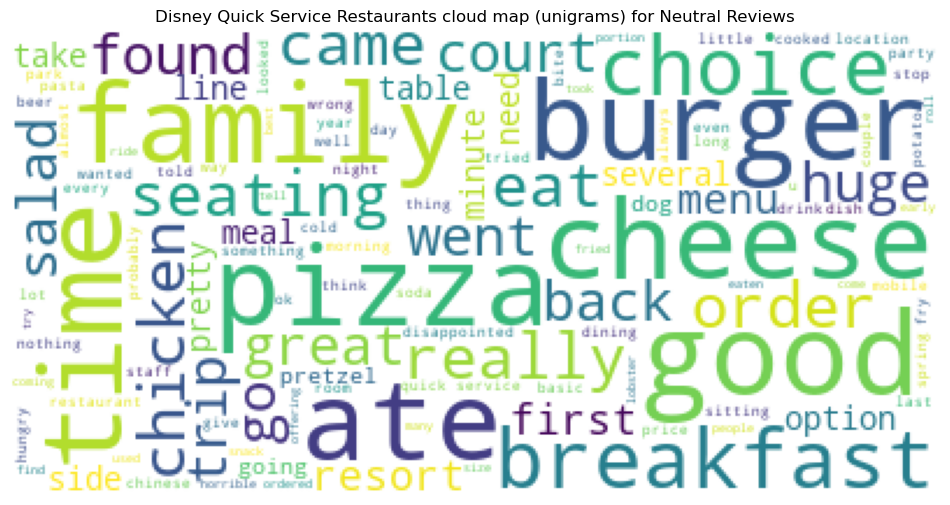

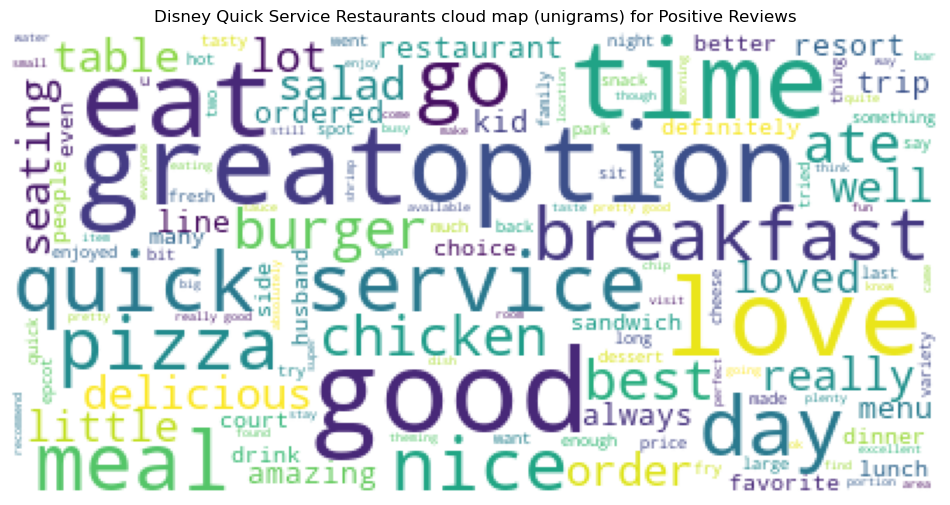

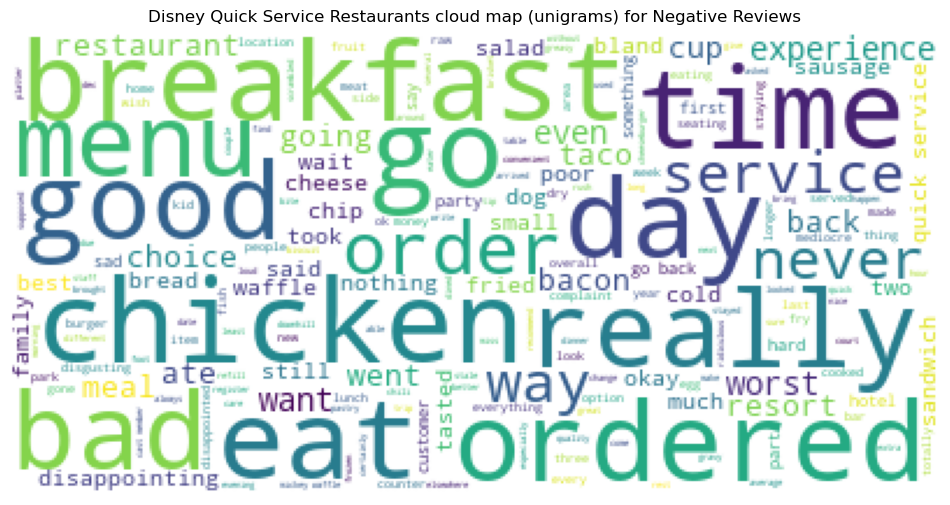

In [178]:
# use unigrams per each sentiment
import matplotlib.pyplot as plt
%matplotlib inline

# using wordcloud to remove stopwords
from wordcloud import WordCloud

remove_words =['food', 'one', 'got', 'place', 'disney']

for sentiment in df_sent["Sentiment"].unique():
    sub_df = df_sent[df_sent["Sentiment"] == sentiment]
    ## to filter the sentiment-specific texts
    list_text = sub_df["review_tokens"].apply(lambda x: " ".join([word for word in x if word not in remove_words]))
    merge_text = " ".join(list_text)
    
    # generate word cloud maps
    wordcloud = WordCloud(max_font_size=50, relative_scaling=.1, background_color='white').generate(merge_text)

    # Display the generated word cloud
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.title(f"Disney Quick Service Restaurants cloud map (unigrams) for {sentiment} Reviews")
    plt.axis("off")

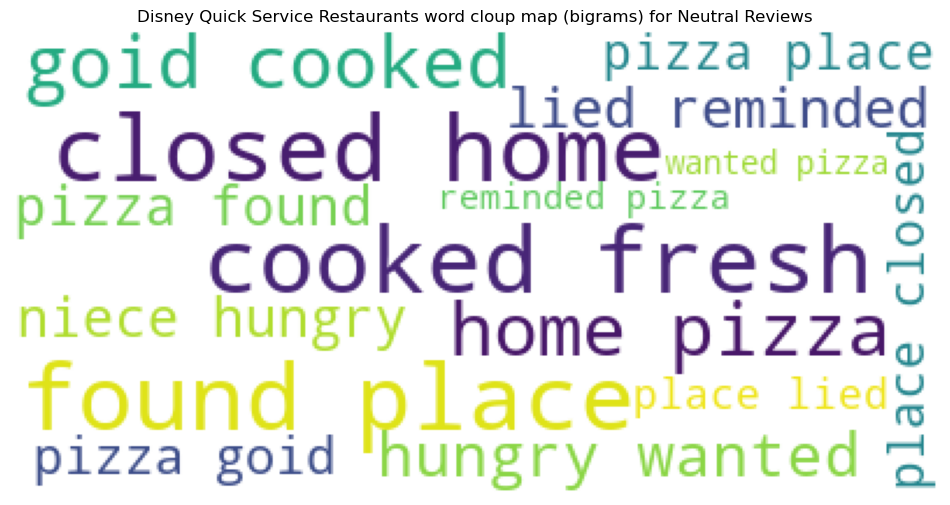

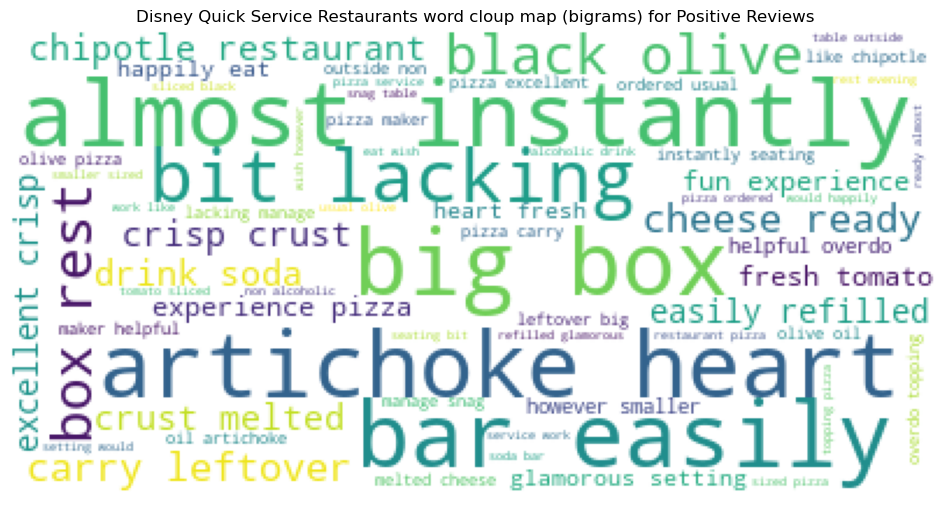

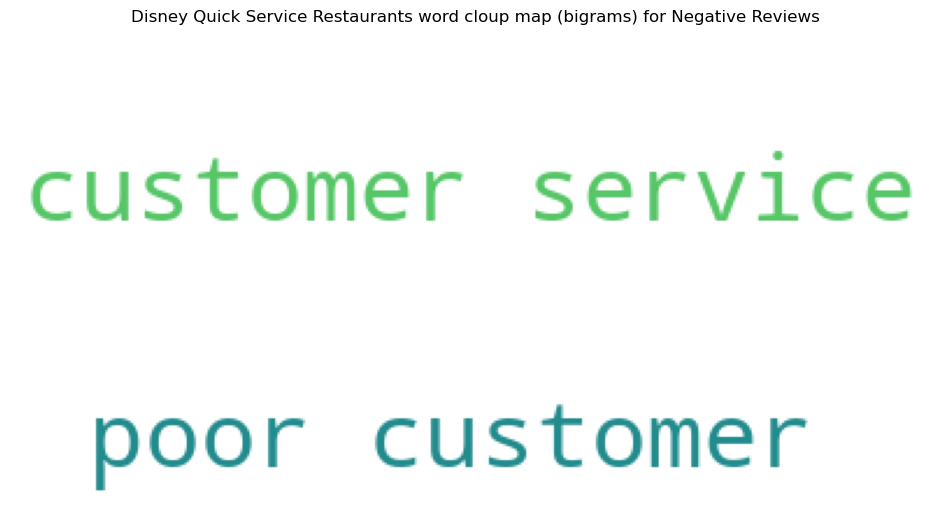

In [182]:
# use bigrams for each sentiment in word clouds

import matplotlib.pyplot as plt
%matplotlib inline

# using wordcloud to remove stopwords
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

for sentiment in df_sent["Sentiment"].unique():
    
    sub_df = df_sent[df_sent["Sentiment"] == sentiment]

    from sklearn.feature_extraction.text import TfidfVectorizer

    # Initialize TfidfVectorizer to consider only bigrams
    tfidfVectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2))

    # Fit and transform the documents
    tfidf_matrix_bigram = tfidfVectorizer_bigram.fit_transform(sub_df['cleaned_review']) # this is one review one document

    # Convert the TF-IDF matrix to a DataFrame for easier viewing
    tfidf_df_bigram = pd.DataFrame(tfidf_matrix_bigram[0].T.toarray(), index=tfidfVectorizer_bigram.get_feature_names_out(), columns = ["TF-IDF"])


    # Generate the word cloud using the bigram scores
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.1, background_color='white')
    # NOTICE: here is .generate_from_frequencies() from the TFIDF scores (numbers)
    wordcloud.generate_from_frequencies(tfidf_df_bigram["TF-IDF"])

    # Display the word cloud
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.title(f"Disney Quick Service Restaurants word cloup map (bigrams) for {sentiment} Reviews")
    plt.axis('off')

### Conclusions

From the NLP analysis above, various analyses can be given to answer the initil data analysis goal questions. 

What kinds of things do customers really like about the restaurants?
- Customers with positive sentiment typically enjoy different things like the food, such as "pizza", "burger", "salad", and use words like "good", "delicious", "fun experience", "glamorous setting" to describe the dining experience. Additionally, customers like restaurants that have reasonable prices, speedy service with friendly staff, places with good theming, and places with lots of seating. As they are restaurants in Disney World, it is important to customers to have places to sit after a long day of waiting in lines and being in the heat. As it is a theme park, having a good theme additionally adds to the restaurant's enjoyment. 

What things do customers not like about the restaurants?
- Customers may not recommend a restaurant because of poor customer service, the quality of the food: bad, bland, or disappointing, the lack of a good experience, or changes in previous years: keywords from Topic Modeling like "skimpy", "downhill", "soggy" indicate that some restaurants may not be as good as in the past.
- Customers may also not like a restaurant from the poor experience. This may be from long lines to get food, lack of seating, poor customer service, lack of theming, or overwhelming environments.

Can we predict whether a customer will recommend a restaurant from their review?
- From the Text Classification, it can be predicted fairly well whether or not a customer will recommmend a restaurant from their review. The Naive Bayes classifier with the test size of 0.3 and CountVectorizer model had accuracy of 0.82, and was able to very well classify Recommended reviews, with precision, recall, and f1-scores of 0.83, 0.99, and 0.90. These metrics were a bit lower for the not recommended group, but overall, the model was able to pinpoint the reviews that were Recommending the restaurant. Understanding whether a customer is likely to recommend or not recommend a restaurant is a good indicator of whether they would want to come again to the restaurant.

What attitude do customers generally have towards Disney quick service restaurants?
- From the Sentiment analysis, a large number of the reviews had positive sentiments. Even reviews that had low ratings for the restaurant or did not recommend the restaurant would still have some positive sentiments, meaning even if they did not enjoy the restaurant, they still used some positive keywords to describe their experience. Restaurants that have good family environments, seating, atmosphere, and quick options stand out in many of the reviews. For restaurants at a theme park, it seems that both the food quality and restaurant environment are key factors in the customer's perception of the restaurant.
  
Do more recent customers have different levels of satisfaction compared to older reviews?
- Sentiment does not appear to be much different for older reviews versus new reviews, indicating that people seem to feel consistent about their thoughts about the restaurants. For reviews in 2024 or newer, a majority of the reviews Recommend the restaurant and had positive sentiment. Average polarity and subjectivity for newer reviews show that they are generally positive, around 0.28, and mostly objective, around 0.57. For reviews in 2023 or older, most reviews are positive and recommend restaurants, with polarity and subjectivity much of the same, at 0.27 and 0.57. Overall, it appears that most people who leave reviews enjoy the restaurants, with very few restaurants with negative or neutral sentiments and few "Not Recommended" restaurants.
  
How are negatively reviewed restaurants typically described compared to positively rated restaurants?
- Negatively reviewed restaurants tend to have more complaints about food quality, where positively rated restaurants praise the food. Negatively reviewed restaurants typically have bad food, described as "greasy", "soggy", "bad", "worst" and "dry", while positively review restaurants are described to have better food, like: "excellent crisp", "great", "delicious", "nice", "great". There is also a difference in the environment of these restaurants: positive reviews have good theming, seating, friendliness, and overall comfort compared to lower rated restaurants.

***

#### What makes a Good Disney Restaurant?

As quick service restaurants in a theme park, it is important to cater more to the specific needs of the visitors of these restaurants compared to a regular restaurant. Customers of these restaurants are expecting to find decent food at a reasonable price, seating, and good theming to match the area that they are visiting. As they are visiting the "Most Magical Place on Earth", it is important that cast members are friendly and welcoming to their guests. The things that are currently working well for restaurants are restaurants that have a lot of seating, good theming, and good food. To improve restaurants with lower reviews, more seating can be added, theming can be improved to be more cohesive or involved, and the quality of the food can be improved to match the standards of other highly reviewed restaurants. Restaurants like Satuli Canteen, Polite Pig, and Sanaa consistently have high ratings, and the topics that stand out in these restaurants are their good, fresh, tasty food, and the environment, through good theming, strong air conditioning, lots of seating, and family-friendliness. Providing lots of theming to restaurants, having cold air conditioning, with lots of seating types for all kinds of families can improve the quality of low ranked restaurants. Low ranked restaurants majorly have complaints about food quality, so improvements can be made by switching up the menu, hiring new chefs, and trying food options that more closely resemble the high quality restaurant options.

By improving food quality, theming, seating, and customer service, Disney dining can be heavily improved. Implementing these improvements can improve guest experiences and encourage guests to visit their restaurants more often, spending more money while visiting the parks.

***

References:

- MIS 670 course materials: Lecture Materials, Homeworks, Labs, Piazza tips
- [Geeks for Geeks resource](https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/) to remove duplicates from a list
- GAI such as ChatGPT: use of GAI indicated by comments in the code. Often used for error fixing or support of tweaking codes to get the exact result desired.
- MIS 665 course materials, especially related to Pandas data cleaning
- [AllEars.net](https://allears.net/dining/menu/search/all/all/all/quick-service/) data source
- [Classification: Accuracy, recall, precision, and related metrics](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall) for reminders of what classification metrics measure